In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data_path = '/content/drive/MyDrive/Parkinson_Multiple_Sound_Recording/train_data.txt'
test_data_path = '/content/drive/MyDrive/Parkinson_Multiple_Sound_Recording/test_data.txt'
train_data = pd.read_csv(train_data_path, sep=',')
test_data = pd.read_csv(test_data_path, sep=',')

print("Train data shape:", train_data.shape)
print("Train data columns:", train_data.columns)
print("\nFirst few rows:")
print(train_data.head())

Train data shape: (1039, 29)
Train data columns: Index(['1', '1.488', '0.000090213', '0.9', '0.794', '2.699', '8.334', '0.779',
       '4.517', '4.609', '6.802', '13.551', '0.905905', '0.119116', '11.13',
       '166.533', '164.781', '10.421', '142.229', '187.576', '160', '159',
       '0.006064725', '0.000416276', '0', '0.1', '0.2', '23', '1.1'],
      dtype='object')

First few rows:
   1  1.488  0.000090213    0.9  0.794  2.699   8.334  0.779  4.517  4.609  \
0  1  0.728     0.000038  0.353  0.376  1.059   5.864  0.642  2.058  3.180   
1  1  1.220     0.000074  0.732  0.670  2.196   8.719  0.875  4.347  5.166   
2  1  2.502     0.000123  1.156  1.634  3.469  13.513  1.273  5.263  8.771   
3  1  3.509     0.000167  1.715  1.539  5.145   9.112  1.040  3.102  4.927   
4  1  2.470     0.000126  1.358  1.341  4.075  10.696  1.256  5.262  7.076   

   ...  187.576   160   159  0.006064725  0.000416276       0  0.1     0.2  \
0  ...  234.505   170   169     0.005181     0.000403   2.247   

In [ ]:
print(train_data.head())
print(test_data.head())


   1  1.488  0.000090213    0.9  0.794  2.699   8.334  0.779  4.517  4.609  \
0  1  0.728     0.000038  0.353  0.376  1.059   5.864  0.642  2.058  3.180   
1  1  1.220     0.000074  0.732  0.670  2.196   8.719  0.875  4.347  5.166   
2  1  2.502     0.000123  1.156  1.634  3.469  13.513  1.273  5.263  8.771   
3  1  3.509     0.000167  1.715  1.539  5.145   9.112  1.040  3.102  4.927   
4  1  2.470     0.000126  1.358  1.341  4.075  10.696  1.256  5.262  7.076   

   ...  187.576   160   159  0.006064725  0.000416276       0  0.1     0.2  \
0  ...  234.505   170   169     0.005181     0.000403   2.247    0   0.000   
1  ...  211.442  1431  1427     0.006071     0.000474  10.656    1   0.178   
2  ...  220.230    94    92     0.004910     0.000320   0.000    0   0.000   
3  ...  225.162   117   114     0.004757     0.000380  18.182    1  13.318   
4  ...  202.812    74    73     0.005118     0.000187  23.214    0   0.000   

   23  1.1  
0  23    1  
1  23    1  
2  23    1  
3  23    1

In [ ]:
print(train_data.isnull().sum())
print();
print(train_data.info())
print();
print(train_data.describe())


1              0
1.488          0
0.000090213    0
0.9            0
0.794          0
2.699          0
8.334          0
0.779          0
4.517          0
4.609          0
6.802          0
13.551         0
0.905905       0
0.119116       0
11.13          0
166.533        0
164.781        0
10.421         0
142.229        0
187.576        0
160            0
159            0
0.006064725    0
0.000416276    0
0              0
0.1            0
0.2            0
23             0
1.1            0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   1            1039 non-null   int64  
 1   1.488        1039 non-null   float64
 2   0.000090213  1039 non-null   float64
 3   0.9          1039 non-null   float64
 4   0.794        1039 non-null   float64
 5   2.699        1039 non-null   float64
 6   8.334        1039 non-null   float64
 7   0.7

In [ ]:
X = train_data.iloc[:, :-1] # Drop the target column (column 29)
y = train_data.iloc[:, -1] # This is the target variable

# Check if X is empty and handle it accordingly
if X.empty:
    print("Error: Input DataFrame X is empty. Please check your data loading or preprocessing steps.")
    # Add code here to handle the empty DataFrame, e.g., load data or fix preprocessing.
else:
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

In [ ]:
print("\nTrain data columns:")
print(train_data.columns)


Train data columns:
Index(['1', '1.488', '0.000090213', '0.9', '0.794', '2.699', '8.334', '0.779',
       '4.517', '4.609', '6.802', '13.551', '0.905905', '0.119116', '11.13',
       '166.533', '164.781', '10.421', '142.229', '187.576', '160', '159',
       '0.006064725', '0.000416276', '0', '0.1', '0.2', '23', '1.1'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       105

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208



Ridge Regression Accuracy: 1.0


SVM Accuracy: 0.9903846153846154


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 1.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))



KNN Accuracy: 0.9423076923076923


In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score

# Example for Logistic Regression
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))


Confusion Matrix:
 [[103   0]
 [  0 105]]
ROC-AUC Score: 1.0


In [ ]:
results = {
    'Model': ['Logistic Regression', 'Ridge', 'SVM', 'Random Forest', 'KNN'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr),
                 accuracy_score(y_test, y_pred_ridge),
                 accuracy_score(y_test, y_pred_svm),
                 accuracy_score(y_test, y_pred_rf),
                 accuracy_score(y_test, y_pred_knn)]
}

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy
0  Logistic Regression  1.000000
1                Ridge  1.000000
2                  SVM  0.990385
3        Random Forest  1.000000
4                  KNN  0.942308


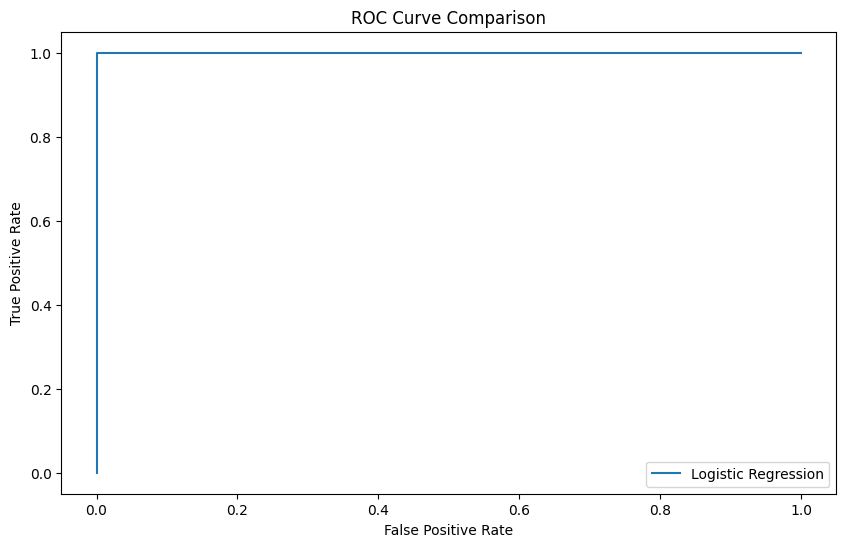

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 6))

# Example: Logistic Regression
fpr, tpr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression')

# Repeat for other models...

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [ ]:
import joblib
import os

# Create a directory to save models
os.makedirs('/content/models', exist_ok=True)

# Save all trained models
joblib.dump(lr_model, '/content/models/logistic_regression_model.pkl')
joblib.dump(ridge_model, '/content/models/ridge_model.pkl')
joblib.dump(svm_model, '/content/models/svm_model.pkl')
joblib.dump(rf_model, '/content/models/random_forest_model.pkl')
joblib.dump(knn_model, '/content/models/knn_model.pkl')

# Save scaler
joblib.dump(scaler, '/content/models/scaler.pkl')

# Prediction function
def predict_parkinson(new_data, model_path, scaler_path):
    # Load scaler and model
    loaded_scaler = joblib.load(scaler_path)
    loaded_model = joblib.load(model_path)

    # Scale the input data
    scaled_data = loaded_scaler.transform(new_data)

    # Make prediction
    prediction = loaded_model.predict(scaled_data)
    return prediction

# Example of how to use the prediction function
# new_sample = test_data.iloc[:1, :-1]  # Example: first row of test data without target
# prediction = predict_parkinson(new_sample, '/content/models/logistic_regression_model.pkl', '/content/models/scaler.pkl')
# print("Prediction:", prediction)

# Optional: Download models
# from google.colab import files
# for model_file in os.listdir('/content/models'):
#     files.download(f'/content/models/{model_file}')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib
import os
import pandas as pd # Import pandas to handle DataFrames

# ... (rest of your existing code) ...

# Prediction function
def predict_parkinson(new_data, model_path, scaler_path):
    # Load scaler and model
    loaded_scaler = joblib.load(scaler_path)
    loaded_model = joblib.load(model_path)

    # Ensure new_data has the correct number of features before scaling
    # If new_data has 27 features (excluding the target), add a dummy target column
    if new_data.shape[1] == 27:
        new_data['target'] = 0  # Add a dummy target column with value 0

    # Ensure new_data has the correct column names before scaling
    # Assume original training data had numerical column indices
    new_data = new_data.copy()  # Create a copy to avoid modifying the original DataFrame
    new_data.columns = range(new_data.shape[1]) # Replace column names with numerical indices

    # Scale the input data
    scaled_data = loaded_scaler.transform(new_data)

    # ***FIX*** Do not remove the dummy target column
    # scaled_data = scaled_data[:, :-1] # Exclude the last column (dummy target)

    # Make prediction
    prediction = loaded_model.predict(scaled_data)
    return prediction

# Example of how to use the prediction function
new_sample = test_data.iloc[:1, :-1]  # Example: first row of test data without target
prediction = predict_parkinson(new_sample, '/content/models/logistic_regression_model.pkl', '/content/models/scaler.pkl')
print("Prediction:", prediction)

Prediction: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the saved models and test data
test_data = pd.read_csv(test_data_path, sep=',')

scaler_path = '/content/models/scaler.pkl'
model_paths = {
    'Logistic Regression': '/content/models/logistic_regression_model.pkl',
    'Ridge': '/content/models/ridge_model.pkl',
    'SVM': '/content/models/svm_model.pkl',
    'Random Forest': '/content/models/random_forest_model.pkl',
    'KNN': '/content/models/knn_model.pkl'
}

# Prepare test data
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]



In [ ]:
print(X_test.shape)


(167, 27)


In [ ]:
# Load scaler
scaler = joblib.load(scaler_path)

# Ensure X_test has the same column names as the data the scaler was fitted on
X_test = X_test.copy()  # Create a copy to avoid modifying the original DataFrame
# Assume original training data had numerical column indices, so set X_test columns to match
X_test.columns = range(X_test.shape[1])

# If X_test has 27 features (excluding the target), add a dummy target column
if X_test.shape[1] == 27:
    X_test[27] = 0  # Add a dummy target column with value 0 and index 27

# Now apply the transform
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Logistic Regression Model Performance:
Accuracy: 0.5509

Confusion Matrix:
[[ 0  0]
 [75 92]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.55      0.71       167

    accuracy                           0.55       167
   macro avg       0.50      0.28      0.36       167
weighted avg       1.00      0.55      0.71       167



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


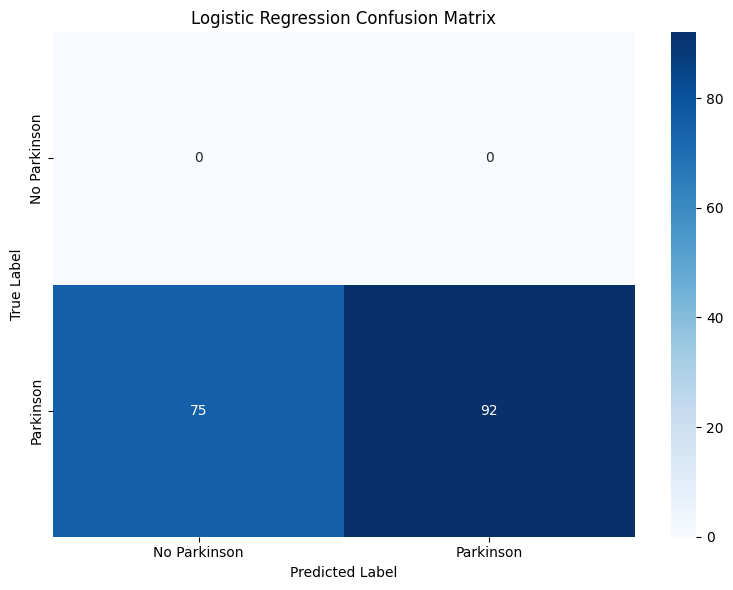

Ridge Model Performance:
Accuracy: 0.5269

Confusion Matrix:
[[ 0  0]
 [79 88]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.53      0.69       167

    accuracy                           0.53       167
   macro avg       0.50      0.26      0.35       167
weighted avg       1.00      0.53      0.69       167



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


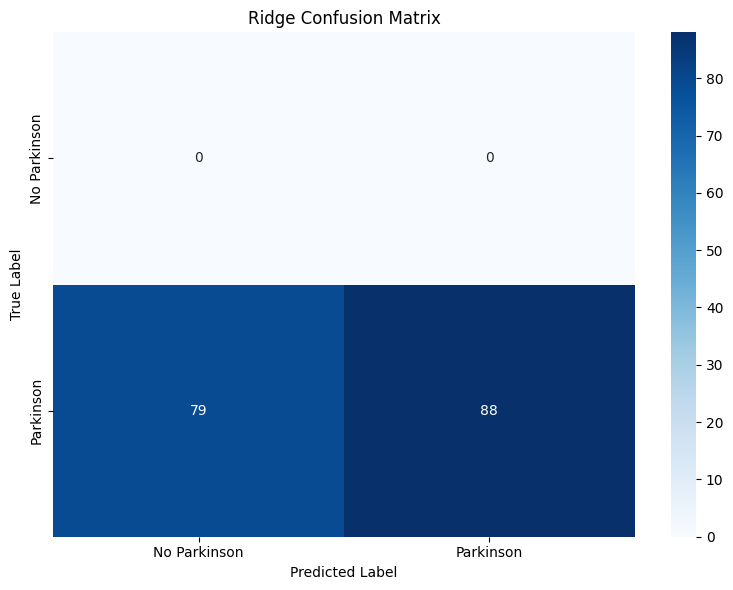

SVM Model Performance:
Accuracy: 0.4611

Confusion Matrix:
[[ 0  0]
 [90 77]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.46      0.63       167

    accuracy                           0.46       167
   macro avg       0.50      0.23      0.32       167
weighted avg       1.00      0.46      0.63       167



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


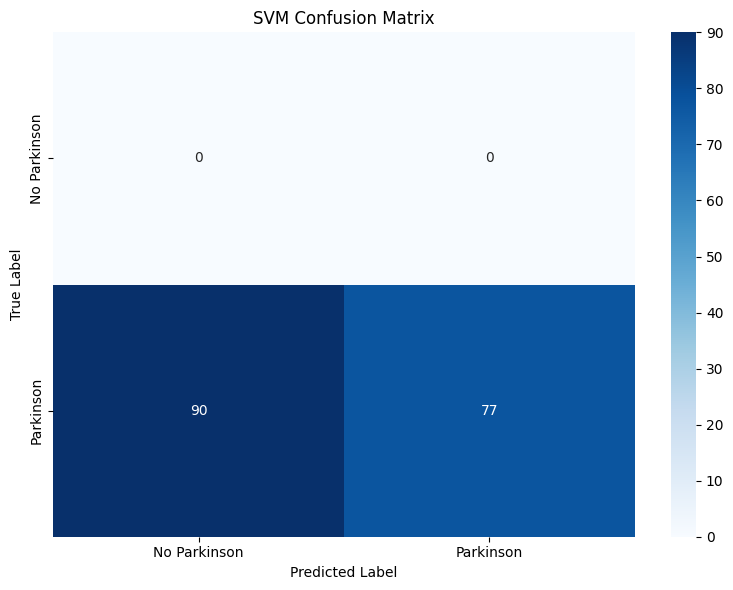

Random Forest Model Performance:
Accuracy: 0.0000

Confusion Matrix:
[[  0   0]
 [167   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00     167.0

    accuracy                           0.00     167.0
   macro avg       0.00      0.00      0.00     167.0
weighted avg       0.00      0.00      0.00     167.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

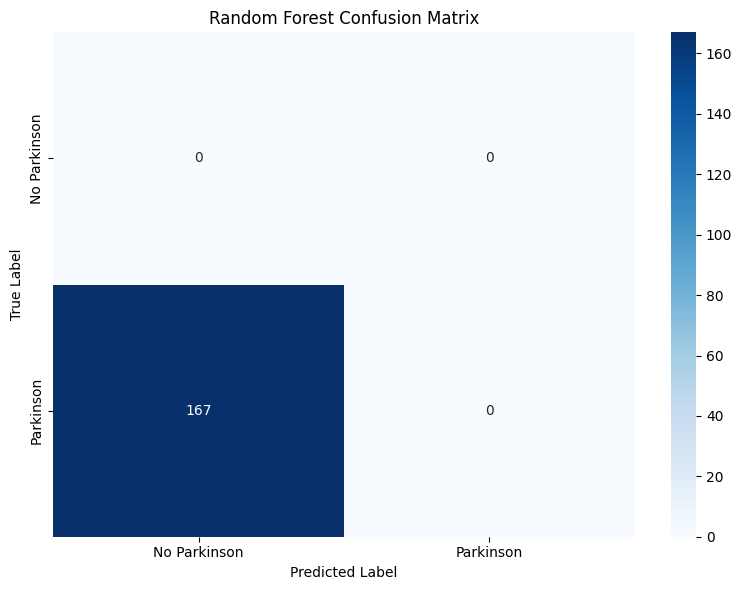

KNN Model Performance:
Accuracy: 0.4551

Confusion Matrix:
[[ 0  0]
 [91 76]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.46      0.63       167

    accuracy                           0.46       167
   macro avg       0.50      0.23      0.31       167
weighted avg       1.00      0.46      0.63       167



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


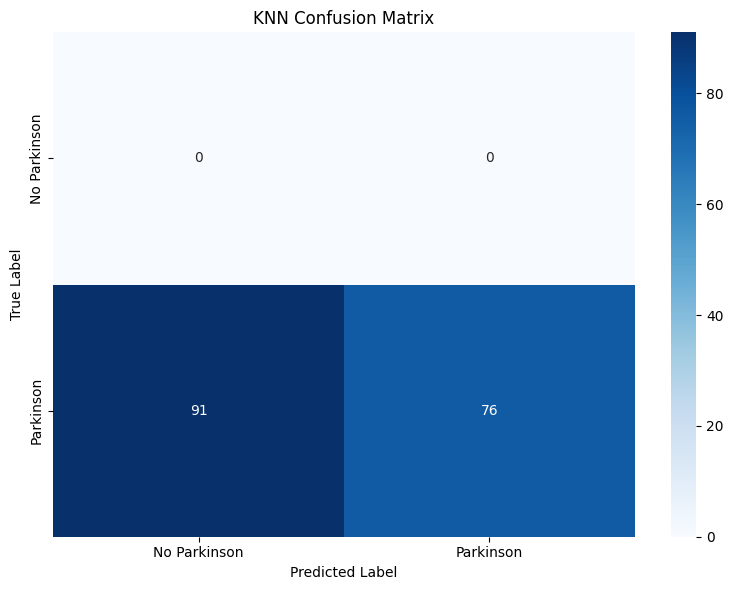

In [ ]:


# Function to evaluate model performance
def evaluate_model(model_path, model_name):
    # Load model
    model = joblib.load(model_path)

    # Predict
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"{model_name} Model Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Visualize Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Parkinson', 'Parkinson'],
                yticklabels=['No Parkinson', 'Parkinson'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

# Evaluate each model
for model_name, model_path in model_paths.items():
    evaluate_model(model_path, model_name)

In [ ]:
git init

SyntaxError: invalid syntax (<ipython-input-1-f188d5ac1197>, line 1)